In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets from the correct path
fraud_df = pd.read_csv('../data/01_raw/Fraud_Data.csv')
ip_country_df = pd.read_csv('../data/01_raw/IpAddress_to_Country.csv')

# Data Cleaning 
print("--- E-commerce Data Initial Info ---")
fraud_df.info()
print(f"\nNumber of duplicate rows: {fraud_df.duplicated().sum()}")

# Remove duplicates
fraud_df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(fraud_df)}")

# Correct data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
print("\n'signup_time' and 'purchase_time' converted to datetime.")

--- E-commerce Data Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

Number of duplicate rows: 0
Number of rows after dropping duplicates: 151112

'signup_time' and 'purchase_time' converted to datetime.


In [ ]:
# --- Feature Engineering (Final Pragmatic Version) ---

print("--- Engineering Time-Based Features ---")

# --- 1. Time-Based Feature ---
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()
print("Created 'time_since_signup' feature (in seconds).")

# Assign the result to our final dataframe name for consistency with the rest of the notebook
ecommerce_df = fraud_df.copy()

print("\nFeature engineering complete.")
print(f"Final shape of the dataframe: {ecommerce_df.shape}")
print("\nPreview of the final dataframe:")
display(ecommerce_df.head())

--- Engineering Time-Based Features ---
Created 'time_since_signup' feature (in seconds).

Feature engineering complete.
Final shape of the dataframe: (151112, 12)

Preview of the final dataframe:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0


Plots will be saved to: ../reports/figures

--- Class Distribution ---
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64
Saved plot: class_distribution.png


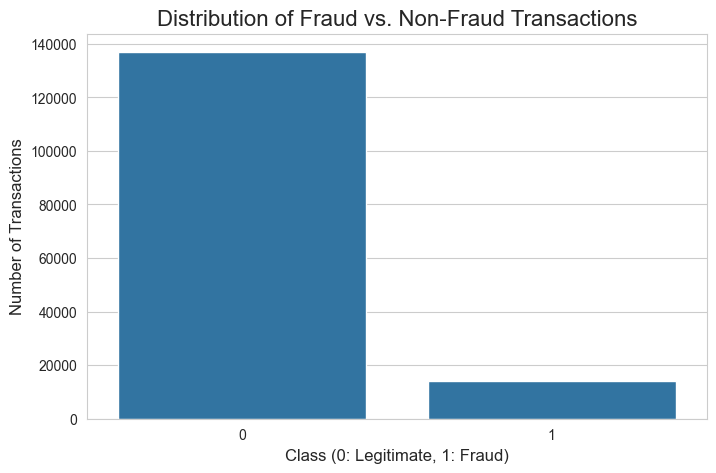

Saved plot: time_since_signup_distribution.png


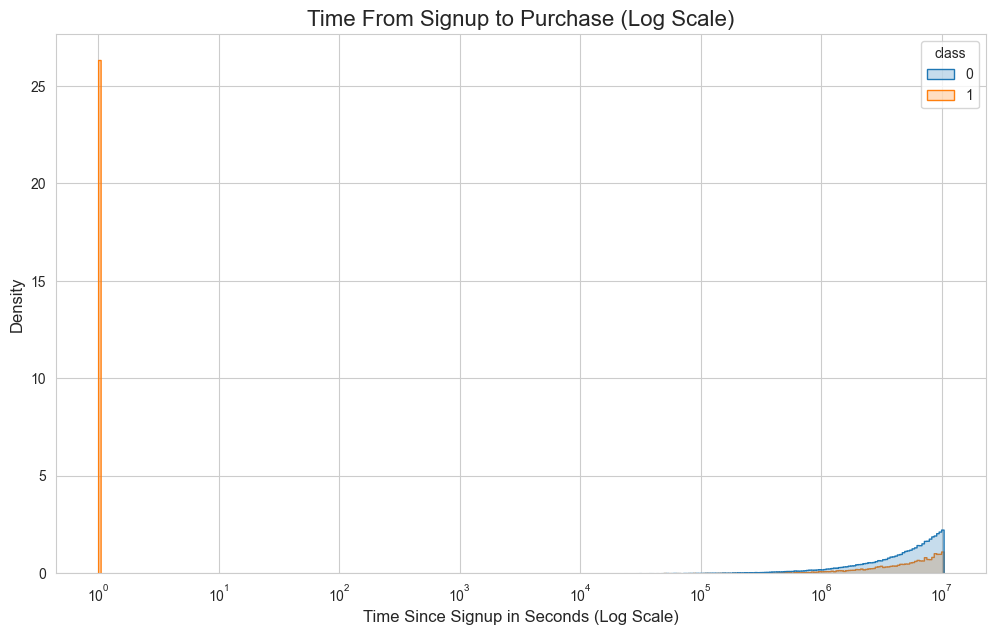

Saved plot: purchase_value_by_class.png


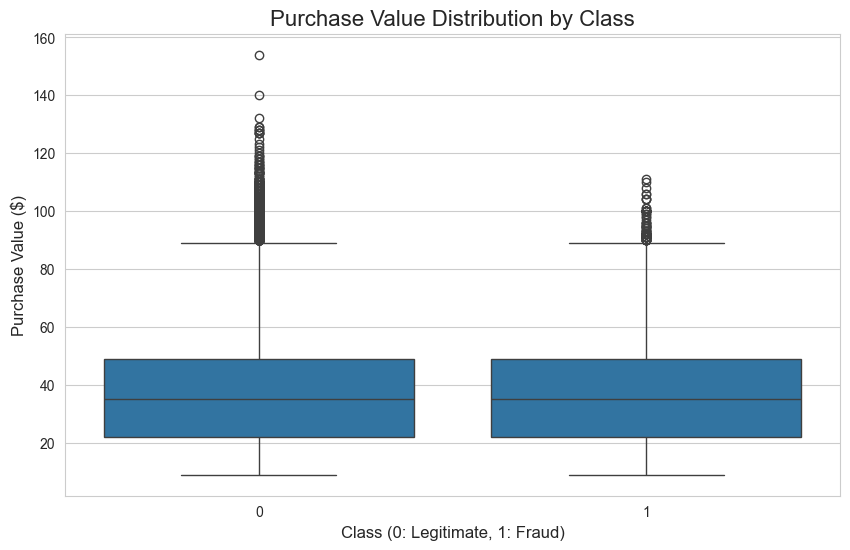

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_28916\3936286130.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')


Saved plot: fraud_rate_by_browser.png


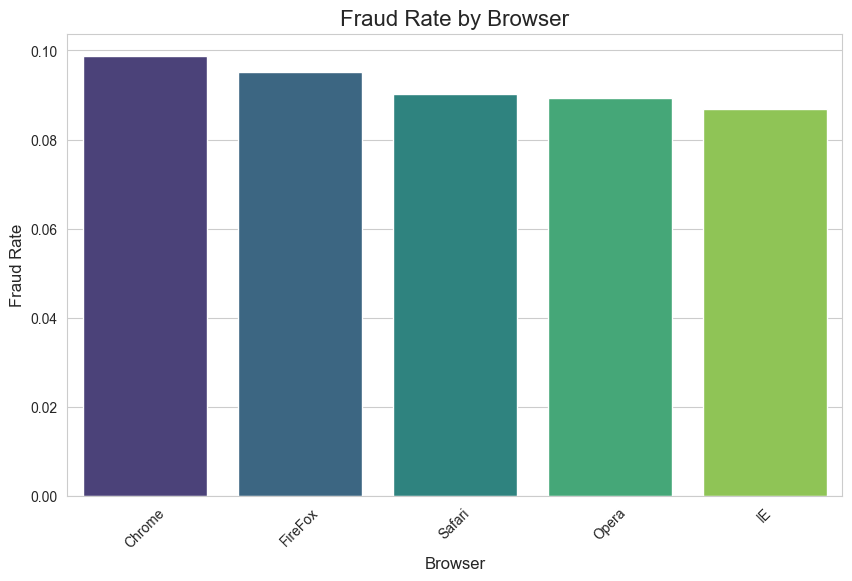

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_28916\3936286130.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')


Saved plot: fraud_rate_by_source.png


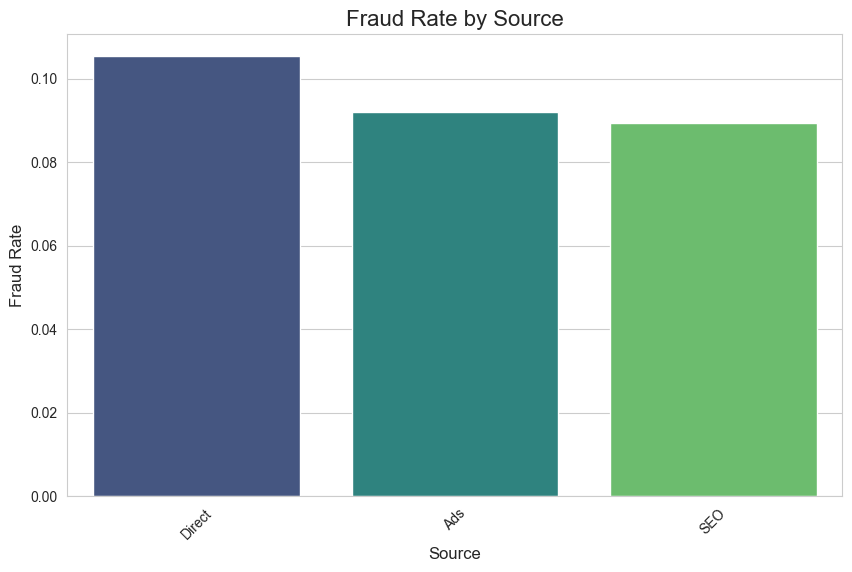

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_28916\3936286130.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')


Saved plot: fraud_rate_by_sex.png


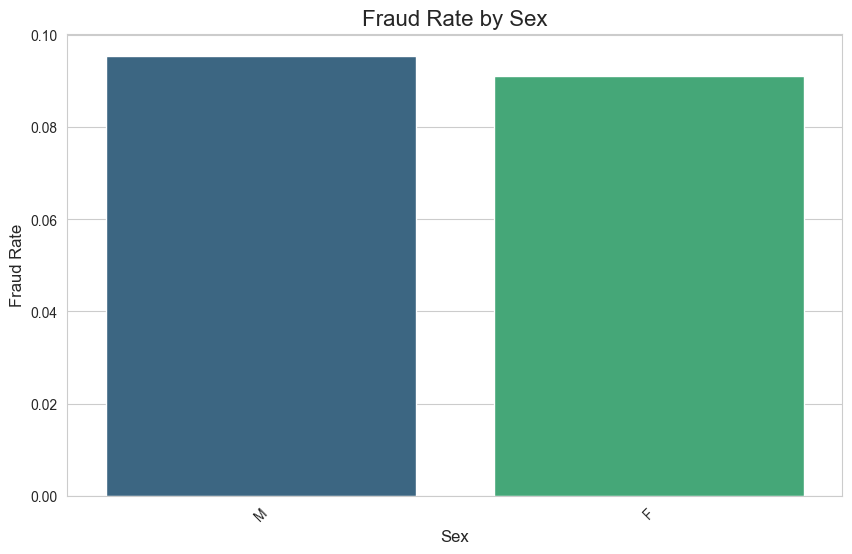

In [ ]:
# Ensure plotting libraries are imported and set a nice style
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

# --- Setup Save Directory ---

output_dir = '../reports/figures'
os.makedirs(output_dir, exist_ok=True)
print(f"Plots will be saved to: {output_dir}")


# --- 1. Analyze Class Imbalance ---
print("\n--- Class Distribution ---")
class_distribution = ecommerce_df['class'].value_counts(normalize=True) * 100
print(class_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=ecommerce_df)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions', fontsize=16)
plt.xlabel('Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Save the figure
filename = 'class_distribution.png'
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
print(f"Saved plot: {filename}")
plt.show()


# --- 2. Analyze Our Engineered Feature: `time_since_signup` ---
plt.figure(figsize=(12, 7))
sns.histplot(data=ecommerce_df, x='time_since_signup', hue='class', 
             log_scale=True, element='step', stat='density', common_norm=False)
plt.title('Time From Signup to Purchase (Log Scale)', fontsize=16)
plt.xlabel('Time Since Signup in Seconds (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Save the figure
filename = 'time_since_signup_distribution.png'
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
print(f"Saved plot: {filename}")
plt.show()


# --- 3. Analyze Numerical Features vs. Fraud ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=ecommerce_df)
plt.title('Purchase Value Distribution by Class', fontsize=16)
plt.xlabel('Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Purchase Value ($)', fontsize=12)

# Save the figure
filename = 'purchase_value_by_class.png'
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
print(f"Saved plot: {filename}")
plt.show()


# --- 4. Analyze Categorical Features vs. Fraud ---
def plot_fraud_rate(column_name):
    fraud_rate = ecommerce_df.groupby(column_name)['class'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='viridis')
    plt.title(f'Fraud Rate by {column_name.capitalize()}', fontsize=16)
    plt.ylabel('Fraud Rate', fontsize=12)
    plt.xlabel(column_name.capitalize(), fontsize=12)
    plt.xticks(rotation=45)
    
    # Save the figure
    filename = f'fraud_rate_by_{column_name}.png'
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
    print(f"Saved plot: {filename}")
    plt.show()

# Call the function for each categorical feature
plot_fraud_rate('browser')
plot_fraud_rate('source')
plot_fraud_rate('sex')